# Tax Plot

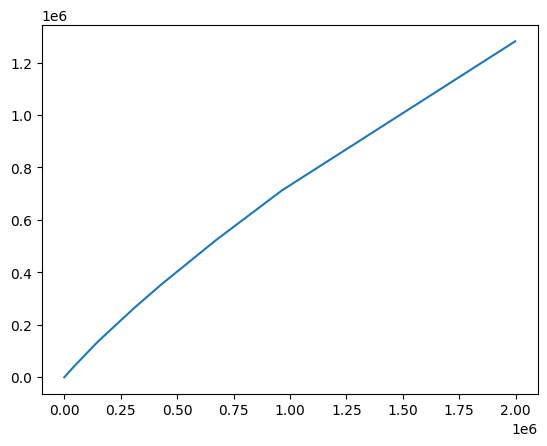

In [1]:
import bisect
import matplotlib.pyplot as plt

def compute_income_after_tax(base: float):
    rates = [0.03, 0.1, 0.2, 0.25, 0.3, 0.35, 0.45]
    thresholds = [36e3, 144e3, 300e3, 420e3, 660e3, 960e3]

    # binary search to find upper-bound to base
    index = bisect.bisect_right(thresholds, base) -1

    # shift to compute intervals
    intervals = [i-j for i, j in zip(thresholds[:index+1] + [base], [0] + thresholds[:index+1])]

    tax = sum(rate * interval for rate, interval in zip(rates, intervals))
    return tax

bases = [i for i in range(0, 2_000_000, 2000)]
y = [base- compute_income_after_tax(base) for base in bases]
plt.plot(bases, y)
plt.show()


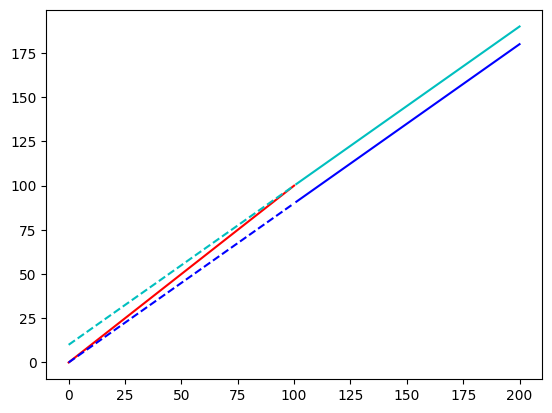

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

rate = 0.1
x1 = [0, 100]
x2 = [101, 110, 200]
y1 = [0, 100]
y_fake = [base * (1-rate) for base in x2]
y_fake_dot = [base * (1-rate) for base in x1]
y_real = [100 + (base - 100) * (1-rate) for base in x2]
y_real_dot = [100 + (base - 100) * (1-rate) for base in x1]
plt.plot(x1, y1, 'r', x2, y_fake, 'b', x2, y_real, 'c', x1, y_fake_dot, 'b--', x1, y_real_dot, 'c--')
plt.show()